<a href="https://colab.research.google.com/github/madhumithasuresh-06/MachineLearningProjects/blob/main/HeartDiseaseDatasetDWM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset info mentioned in UCI Machine Learning Repository.
 Attribute Information:
   -- Only 14 used
      -- 1.  (age)       
      -- 2.   (sex)       
      -- 3.   (cp)        
      -- 4.  (trestbps)  
      -- 5.  (chol)      
      -- 6.  (fbs)       
      -- 7.  (restecg)   
      -- 8.  (thalach)   
      -- 9.  (exang)     
      -- 10.  (oldpeak)   
      -- 11.  (slope)     
      -- 12.  (ca)        
      -- 13.  (thal)      
      -- 14.  (num) ->target


      0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)

In [543]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Upload dataset

In [544]:
data=pd.read_csv('/content/processed.cleveland.data',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [545]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [546]:
data.shape

(303, 14)

# Data cleaning

1.Handling Missing Values

In [547]:
Clean_data=pd.read_csv('/content/processed.cleveland.data',header=None)

In [548]:
Clean_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [549]:
Clean_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,13
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [550]:
print(Clean_data[11].unique())
print(Clean_data[12].unique())


['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


Fix Inconsistent formats

In [551]:
Clean_data = data.replace('?', None)


In [552]:
print(Clean_data[11].unique())
print(Clean_data[12].unique())

['0.0' '3.0' '2.0' '1.0' None]
['6.0' '3.0' '7.0' None]


In [553]:
Clean_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0



1. Imputation(central tendancy)
2.Dropping

/tmp/ipython-input-2042212074.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Clean_data[11])


<Axes: xlabel='11', ylabel='Density'>

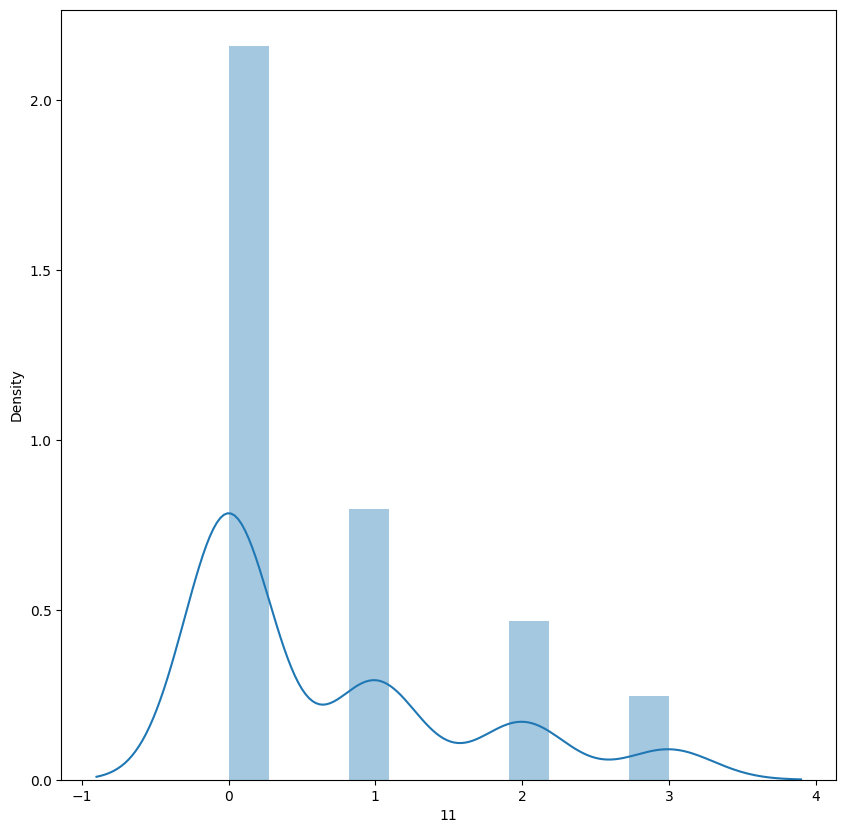

In [554]:
fig,ax=plt.subplots(figsize=(10,10))
sns.distplot(Clean_data[11])


 values are not distributed properly so mean is not possible to apply
 median or mode

In [555]:
Clean_data[11].fillna(Clean_data[11].mode()[0],inplace=True)

/tmp/ipython-input-2918197350.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Clean_data[11].fillna(Clean_data[11].mode()[0],inplace=True)


/tmp/ipython-input-2722482765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Clean_data[12])


<Axes: xlabel='12', ylabel='Density'>

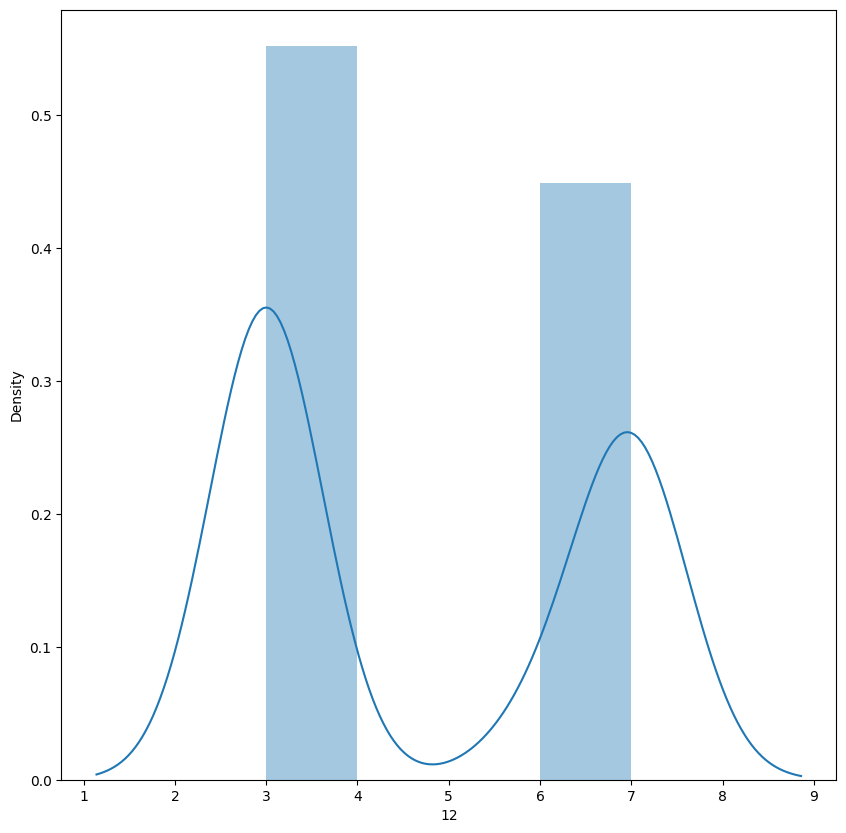

In [556]:
fig,ax=plt.subplots(figsize=(10,10))
sns.distplot(Clean_data[12])

In [557]:
Clean_data[12].fillna(Clean_data[12].mode()[0],inplace=True)

/tmp/ipython-input-2065037050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Clean_data[12].fillna(Clean_data[12].mode()[0],inplace=True)


In [558]:
Clean_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Remove duplicate

In [559]:
Clean_data.duplicated().sum()

np.int64(0)

In [560]:
Clean_data.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
5,float64
6,float64
7,float64
8,float64
9,float64


In [561]:
Clean_data = Clean_data.apply(pd.to_numeric)

In [562]:
Clean_data.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
5,float64
6,float64
7,float64
8,float64
9,float64


Outlier detection

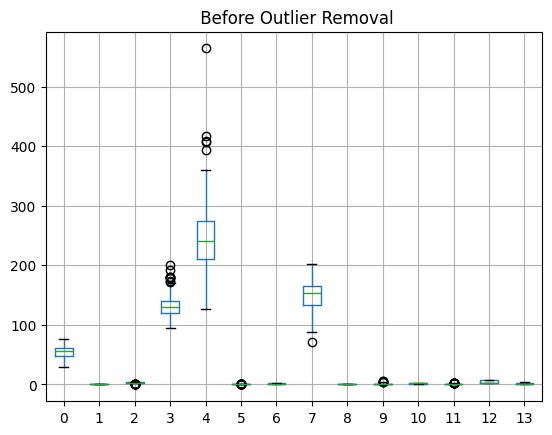

In [563]:
plt.figure()
Clean_data.boxplot()
plt.title(" Before Outlier Removal")
plt.show()


In [564]:
Q1 = Clean_data.quantile(0.25)
Q3 = Clean_data.quantile(0.75)

IQR = Q3 - Q1

Clean_data =Clean_data[~((Clean_data < (Q1 - 1.5 * IQR)) |
          (Clean_data > (Q3 + 1.5 * IQR))).any(axis=1)]


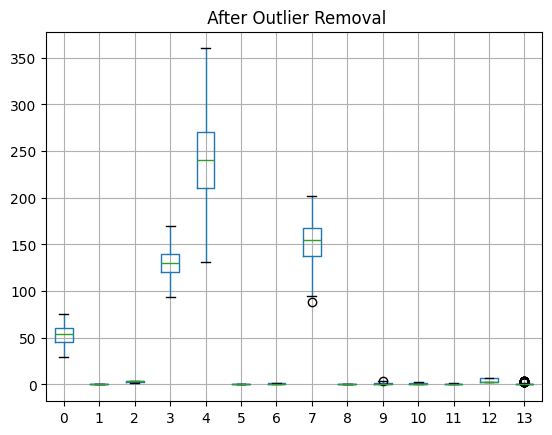

In [565]:
plt.figure()
Clean_data.boxplot()
plt.title(" After Outlier Removal")
plt.show()

In [566]:
Clean_data.shape

(216, 14)

# 2.Data Transformation

In [567]:
Data_transform=Clean_data

In [568]:
a=Data_transform.drop(columns=[13])
b=Data_transform[13]

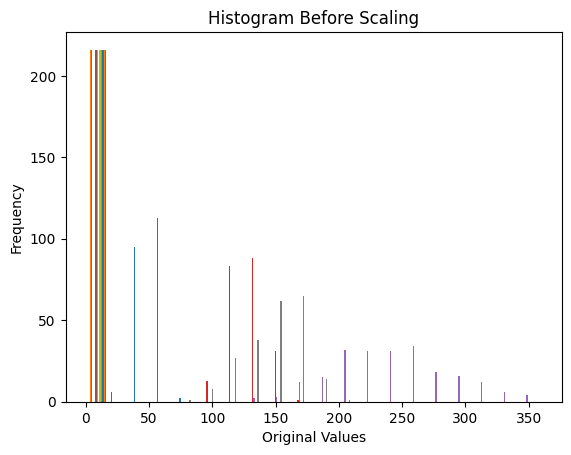

In [569]:
plt.figure()
plt.hist(a, bins=20)
plt.title("Histogram Before Scaling")
plt.xlabel("Original Values")
plt.ylabel("Frequency")
plt.show()

In [570]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(a)

scaled_data = pd.DataFrame(a, columns=a.columns)
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0


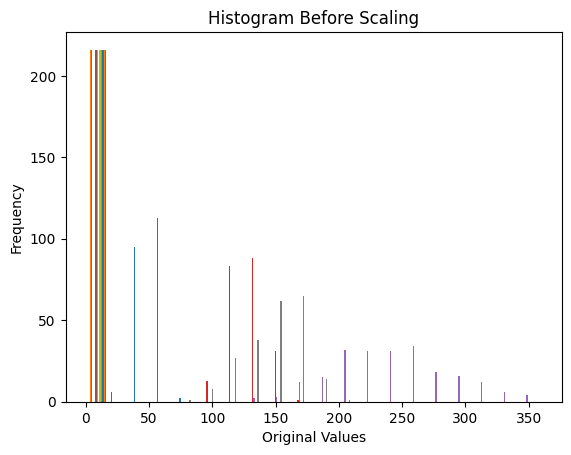

In [571]:
plt.figure()
plt.hist(scaled_data, bins=20)
plt.title("Histogram Before Scaling")
plt.xlabel("Original Values")
plt.ylabel("Frequency")
plt.show()


In [572]:
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0


# Feature Selection
Remove Low-Variance Features

Eliminate Highly Correlated Features

Apply Dimensionality Reduction (PCA)

In [573]:
Data_feature=scaled_data

In [574]:
variance = Data_feature.var()
print(variance)

0       82.811628
1        0.224785
2        0.613178
3      220.515741
4     2033.825237
5        0.000000
6        0.988372
7      505.711434
8        0.216710
9        1.055395
10       0.342808
11       0.463738
12       3.704651
dtype: float64


1.Remove low variance features

In [575]:
Data_feature= Data_feature.loc[:, variance > 0.01]

In [576]:
Data_feature.head()

,0,1,2,3,4,6,7,8,9,10,11,12
2,67.0,1.0,4.0,120.0,229.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
5,56.0,1.0,2.0,120.0,236.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
6,62.0,0.0,4.0,140.0,268.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0


No feature is removed becauze even min value is also not near to 0

In [577]:
correlation=Data_feature.corr()

<Axes: >

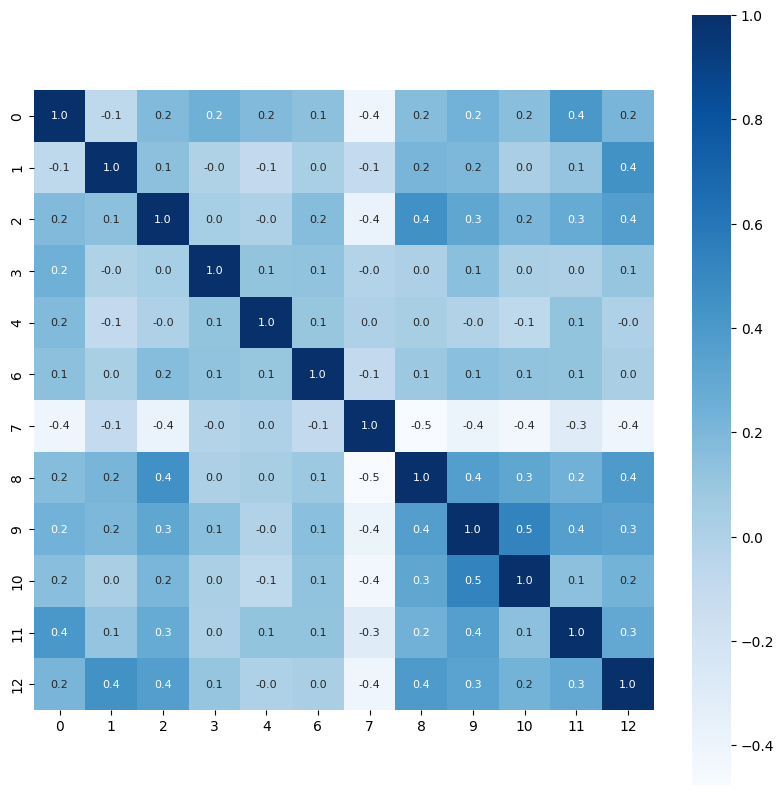

In [578]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [579]:
corr_matrix = Data_transform.corr()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
Data_feature = Data_feature.drop(columns=to_drop)

print("Removed:", to_drop)


Removed: []


In [580]:
X = scaled_data
y = Clean_data[13]

In [581]:
X.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [582]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Scale only X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X_scaled, y)

print("Selected features:",
      X.columns[selector.get_support()])


Selected features: Index([2, 8, 9, 11, 12], dtype='int64')


In [583]:
X_selected = X[[4, 7, 9, 11, 12]]
y = Clean_data[13]

## Dimentionality reduction

In [584]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [585]:
lda = LinearDiscriminantAnalysis(n_components=2)

X_lda = lda.fit_transform(X_selected, y)


In [586]:
X_lda = pd.DataFrame(X_lda, columns=["LD1", "LD2"])


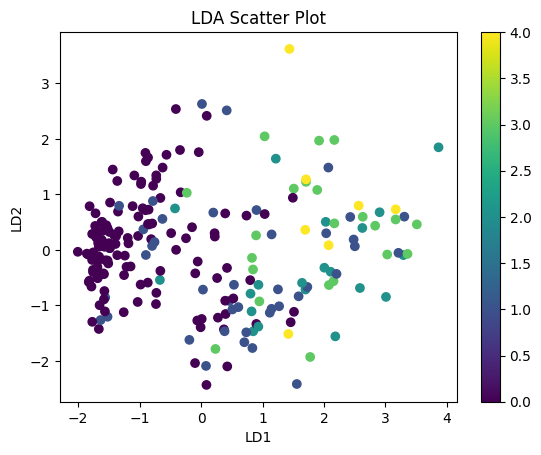

In [587]:
plt.figure()

scatter = plt.scatter(
    X_lda["LD1"],
    X_lda["LD2"],
    c=y
)

plt.title("LDA Scatter Plot")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.colorbar(scatter)
plt.show()


# After Cleaning:

In [588]:
X = Clean_data.drop(columns=[13])
y = Clean_data[13]

In [589]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [590]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [591]:
y_train_pred = model.predict(X_train)
print("Train Accuracy After LDA:",accuracy_score(y_train, y_train_pred))

Train Accuracy After LDA: 0.6918604651162791


In [592]:
y_test_pred = model.predict(X_test)

print("Test Accuracy After LDA:",accuracy_score(y_test, y_test_pred))


Test Accuracy After LDA: 0.7272727272727273


# After TransFormation:

In [593]:
X = scaled_data
y = Clean_data[13]

In [594]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [595]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [596]:
y_train_pred = model.predict(X_train)
print("Train Accuracy After LDA:",accuracy_score(y_train, y_train_pred))

Train Accuracy After LDA: 0.6918604651162791


In [597]:
y_test_pred = model.predict(X_test)

print("Test Accuracy After LDA:",accuracy_score(y_test, y_test_pred))


Test Accuracy After LDA: 0.7272727272727273


# After Feature Selection

In [598]:
X_selected = X[[4, 7, 9, 11, 12]]
y = Clean_data[13]

In [599]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size=0.2,random_state=42)

In [600]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [601]:
y_train_pred = model.predict(X_train)
print("Train Accuracy After LDA:",accuracy_score(y_train, y_train_pred))


Train Accuracy After LDA: 0.686046511627907


In [602]:
y_test_pred = model.predict(X_test)

print("Test Accuracy After LDA:",accuracy_score(y_test, y_test_pred))


Test Accuracy After LDA: 0.6363636363636364


# After Dimentional Reduction

In [603]:
X=X_lda
y = Clean_data[13]

In [604]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y,test_size=0.2,random_state=42)

In [605]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [606]:
y_train_pred = model.predict(X_train)
print("Train Accuracy After LDA:",accuracy_score(y_train, y_train_pred))

Train Accuracy After LDA: 0.6686046511627907


In [607]:
y_test_pred = model.predict(X_test)

print("Test Accuracy After LDA:",accuracy_score(y_test, y_test_pred))


Test Accuracy After LDA: 0.7045454545454546
